# Phase 1 Project: Microsoft Movie Studios - Movie Analysis

Please fill out: 
* Student name: *Stephen Kimiti*
* Student pace: *Part time*
* Scheduled project review date/time: *24.July.2023*
* Instructor name: *Maryanne Mwikali*
* Blog post URL: https: *//www.boxofficemojo.com/*


In [31]:
from PIL import Image


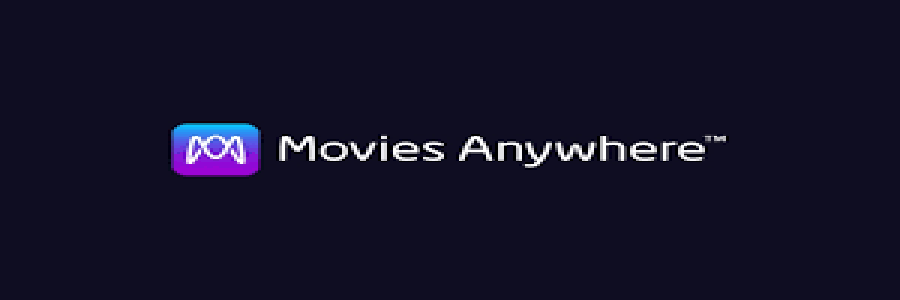

In [32]:
image = Image.open("movies anywhere.png")
width = 900
height = 300
resized_image = image.resize((width, height))
resized_image

# Overview

This project uses exploratory data analysis which is an approach to analyse data to summarise their main characteristics and often with visual methods and this will generate movie insights for Microsoft Corporation.
Microsoft's best-known software products are the Windows line of operating systems, the Microsoft 365 suite of productivity applications, and the Internet Explorer and Edge web browsers. Its flagship hardware products are the Xbox video game consoles and the Microsoft Surface lineup of touchscreen personal computers.
Microsoft is always looking to diversify and venture into new business industries.

# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. In this project we will explore what types of films are currently doing the best at the box office. We will translate our findings into actionable insights that the stakeholders of Microsoft's new movie studio can use to help decide what type of films to create.

# Data Understanding

In order to assist Microsoft's new movie studio in making informed decisions about the types of films to create, a comprehensive analysis of the current box office trends and successful film genres was conducted using data from Box Office Mojo. Box Office Mojo is a reputable online source that provides comprehensive information on box office performance, including domestic and international box office revenues, film genres, release dates, and critical reception. By analyzing the data from this platform, we aim to gain insights into the types of films that are currently performing well at the box office and identify potential opportunities for Microsoft's movie studio.

The insights obtained from this data analysis will serve as a foundation for making informed decisions regarding the types of films that Microsoft's new movie studio should focus on. By understanding the current trends in the film industry and the genres that are resonating well with audiences, the head of the studio can strategically align their creative vision with the market demands, increasing the chances of producing successful and profitable movies.

# movies Dataset

The movies dataset includes movies released from 2010 to 2018, and includes a wide variety of movie title, movie studio, movie genre, movie ratings, domestic and foreign gross.

In [33]:
#importing the necessary Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [34]:
#importing the dataset
df = pd.read_csv('bom.movie_gross.csv.gz')
df1 = pd.read_csv('imdb.title.basics.csv.gz')
df2 = pd.read_csv('imdb.title.ratings.csv.gz')

In [35]:
#Understanding the imported dataset.
print(df.shape)
print(df1.shape)
print(df2.shape)

(3387, 5)
(146144, 6)
(73856, 3)


In [36]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [37]:
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [38]:
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# Data Preparation

This will enable us answer the questions:

1. Which genres make the highest gross?
2. Which genres have the highest ratings?

# Data Cleaning

Here, I will remove all the null values in the columns and also drop all the unnecessary columns. This will enable me attain data visualization.


# Merging Datasets

I will create a variable called movies and merge all my three data sets. Datasets df1 & df2 have a common column 'tconst', thus I will join them first using the common column as my index.This will allow an easy for a 1:1 merge.

In [39]:
df1.set_index('tconst', inplace=True)
df1.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [40]:
df2.set_index('tconst', inplace=True)
df2.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [41]:
movies1 = df1.join(df2, how='inner')
movies1.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


Combining the files yields a single dataset for feature engineering and analysis. I exclude any unmatched data to ensure there are no missing values for the date features. I also exclude mismatched data.

In [42]:
movies1.reset_index('tconst', inplace=True)

In [43]:
# Combining all the datasets into one table & Determining the no. of records in our dataset
movies = df.join(movies1, how = 'inner')
movies.shape

(3387, 13)

In [44]:
movies.drop('start_year', axis=1, inplace=True)

In [45]:
# Drop unnecessary columns
movies.drop(['foreign_gross','tconst', 'primary_title', 'original_title', 'year', 'runtime_minutes', 'studio', 'title'], 
            axis=1, inplace=True)
print(movies.columns)

Index(['domestic_gross', 'genres', 'averagerating', 'numvotes'], dtype='object')


In [46]:
#Summary of data contained in movies dataset
movies.describe().round(2)

,domestic_gross,averagerating,numvotes
count,3.359000e+03,3387.00,3387.00
mean,2.874585e+07,6.14,26249.55
std,6.698250e+07,1.39,98262.84
min,1.000000e+02,1.40,5.00
25%,1.200000e+05,5.30,34.00
50%,1.400000e+06,6.30,239.00
75%,2.790000e+07,7.10,3308.00
max,9.367000e+08,10.00,1841066.00


In [47]:
movies = movies.drop_duplicates(subset='genres')
movies

,domestic_gross,genres,averagerating,numvotes
0,415000000.0,"Action,Crime,Drama",7.0,77
1,334200000.0,"Biography,Drama",7.2,43
2,296000000.0,Drama,6.9,4517
3,292600000.0,"Comedy,Drama",6.1,13
4,238700000.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...
3224,258000.0,"Comedy,Family,Sci-Fi",3.7,275
3252,2300000.0,"Adventure,Documentary,News",8.1,12
3285,990000.0,"Crime,Mystery,Sci-Fi",6.5,15
3289,833000.0,"Comedy,Crime,Family",3.2,479


In [48]:
# Filter out movies with null values in the respective columns.
movies.dropna(inplace=True)

In [49]:
#checking null values
movies.isnull().sum()

domestic_gross    0
genres            0
averagerating     0
numvotes          0
dtype: int64

In [50]:
#checking dataset information
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 3349
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   domestic_gross  337 non-null    float64
 1   genres          337 non-null    object 
 2   averagerating   337 non-null    float64
 3   numvotes        337 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB


# Data Modeling

Here we will reduce our data to a considerable and useful one, we will select movie genres with the ratings highest and lowest ratings and domestic gross.
This will enable us know which genres will make more money and the ones that will attract consumers i.e those that have the highest ratings.

In [51]:
#Data showing Top 10 movie genres with highest domestic gross
top_10_gross_domestic_gross = movies.nlargest(10, "domestic_gross")
top_10_gross_domestic_gross

,domestic_gross,genres,averagerating,numvotes
0,415000000.0,"Action,Crime,Drama",7.0,77
328,381000000.0,"Action,Drama,Sport",6.0,35
1129,368100000.0,"Documentary,Drama,History",8.5,48
1,334200000.0,"Biography,Drama",7.2,43
6,312400000.0,"Adventure,Animation,Comedy",8.1,263
5,300500000.0,"Horror,Thriller",4.1,32
2,296000000.0,Drama,6.9,4517
3,292600000.0,"Comedy,Drama",6.1,13
331,281300000.0,Romance,6.1,15
8,251500000.0,History,4.6,64


In [52]:
#Data showing Top 10 movie genres with highest Average Ratings
top_10_averagerating = movies.nlargest(10, "averagerating")
top_10_averagerating

,domestic_gross,genres,averagerating,numvotes
669,153000.0,"Comedy,Documentary,Sport",9.7,22
681,120000.0,"Documentary,History,War",9.2,29
703,34800.0,"Crime,Documentary,Drama",9.2,8
897,4900000.0,"Biography,Drama,War",8.8,12
1510,58600000.0,"Crime,Documentary,History",8.7,46
1900,1300000.0,"Adventure,Biography,Documentary",8.7,11
2184,163000.0,"Biography,Documentary,Drama",8.7,29
280,288000.0,"Adventure,Drama,Sci-Fi",8.6,1299334
216,1100000.0,"Documentary,Music",8.5,29725
866,17500000.0,"Comedy,Family,Thriller",8.5,14


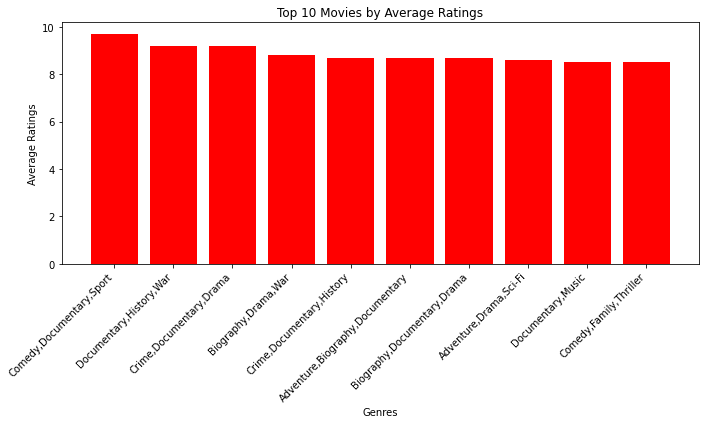

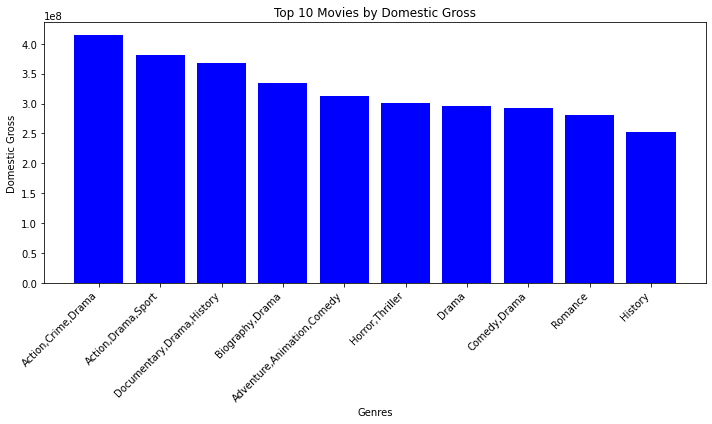

In [53]:

# Create the bar chart showing Top 10 Movies by Average Ratings
plt.figure(figsize=(10, 6))
plt.bar(top_10_averagerating['genres'], top_10_averagerating['averagerating'], color='red')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Genres')
plt.ylabel('Average Ratings')
plt.title('Top 10 Movies by Average Ratings')
plt.tight_layout()
plt.savefig("graph1.png")

# Create the bar chart showing Top 10 Movies by Domestic Gross
plt.figure(figsize=(10, 6))
plt.bar(top_10_gross_domestic_gross['genres'], top_10_gross_domestic_gross['domestic_gross'], color='blue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Genres')
plt.ylabel('Domestic Gross')
plt.title('Top 10 Movies by Domestic Gross')
plt.tight_layout()
plt.savefig("graph2.png")

plt.show()

In [54]:
#Data showing Least 10 movie genres with least Average Ratings
least_10_averagerating = movies.nsmallest(10, "averagerating")
least_10_averagerating

,domestic_gross,genres,averagerating,numvotes
431,53300000.0,"Mystery,Romance",1.7,201
16,107000000.0,"Action,Animation,Comedy",1.9,8248
2406,6200000.0,"Action,War",2.4,246
2433,467000.0,"Drama,Romance,Sport",2.9,351
180,6700000.0,"Adventure,Comedy",3.0,186
417,52700000.0,"Action,Horror,Sci-Fi",3.0,791
1550,32500000.0,"Horror,Sci-Fi",3.1,408
293,33200.0,"Adventure,Family",3.2,94
3289,833000.0,"Comedy,Crime,Family",3.2,479
65,48100000.0,"Action,Thriller",3.3,2862


In [55]:
#Data showing Least 10 movie genres with least Domestic gross
least_10_gross_domestic_gross = movies.nsmallest(10, "domestic_gross")
least_10_gross_domestic_gross

,domestic_gross,genres,averagerating,numvotes
1476,100.0,"Comedy,Drama,Musical",5.5,8
2756,300.0,"Drama,Family,Sport",4.6,231
314,2600.0,"Drama,Fantasy,Mystery",7.4,35
2751,3100.0,"Adventure,Crime,Thriller",6.3,25547
543,4800.0,"Comedy,Fantasy",5.2,8
307,5000.0,"Comedy,Drama,War",7.9,12
1117,6000.0,"Action,Horror,Mystery",4.1,14586
1691,8500.0,"Action,Comedy,Family",5.5,36767
1464,9700.0,"Drama,Musical,War",5.8,191
1855,11300.0,"Sci-Fi,Western",7.0,27


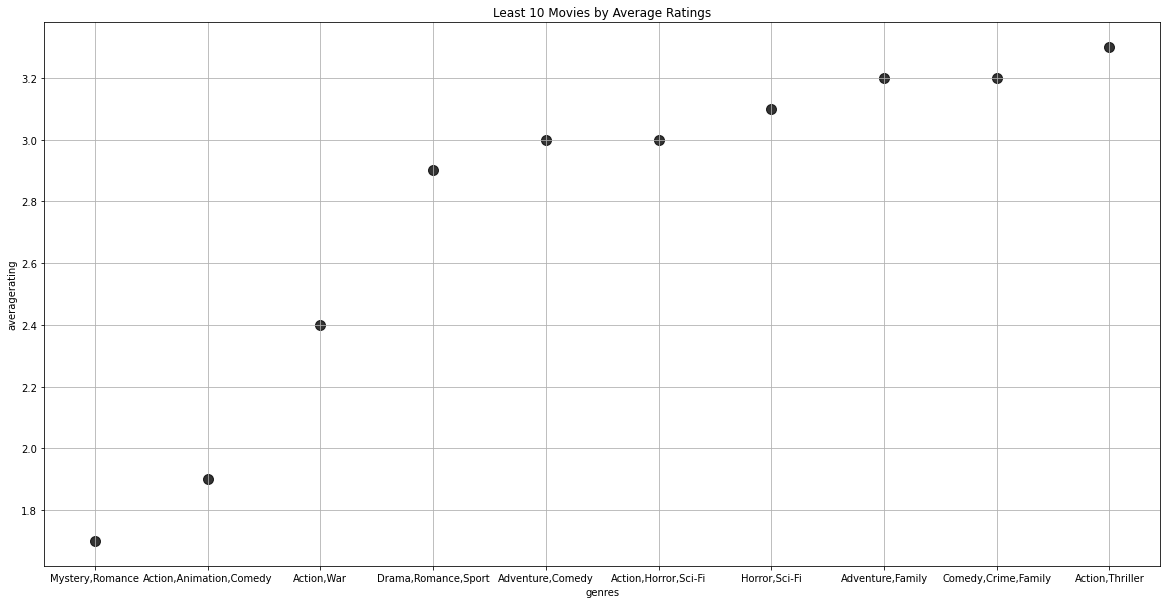

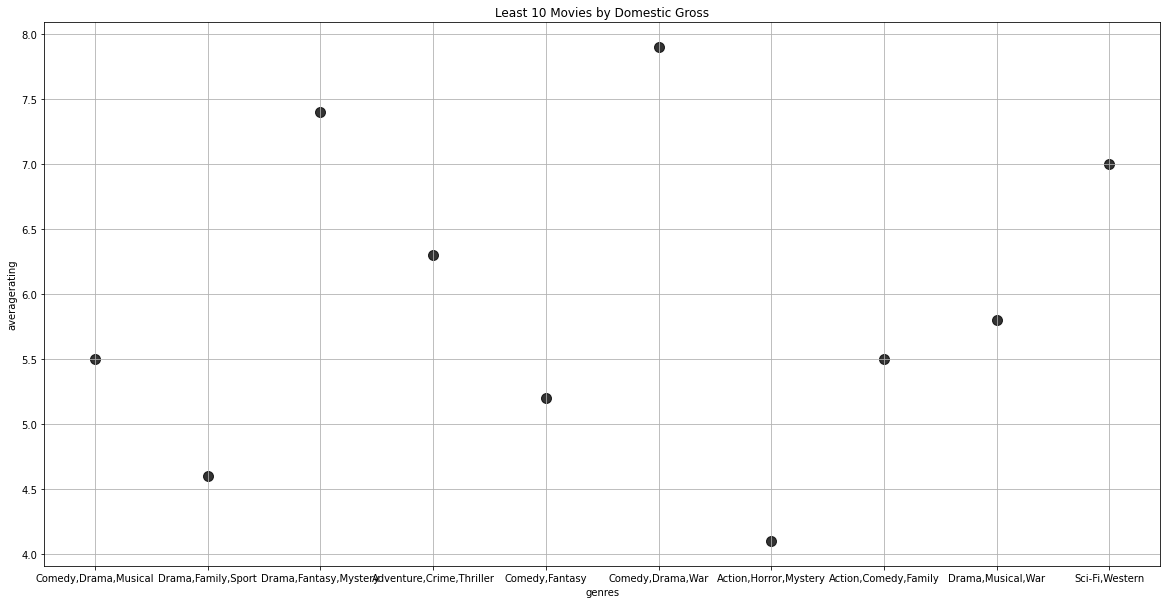

In [56]:
# Create the scatter graph showing Least 10 Movies by Average Ratings
plt.figure(figsize=(20, 10))
plt.scatter(least_10_averagerating['genres'], least_10_averagerating['averagerating'], c='black', marker='o', s=100, alpha=0.8)
plt.xlabel('genres')
plt.ylabel('averagerating')
plt.title('Least 10 Movies by Average Ratings')
plt.grid(True)
plt.savefig("graph3.png")

# Create the scatter chart showing Least 10 Movies by Domestic Gross
plt.figure(figsize=(20, 10))
plt.scatter(least_10_gross_domestic_gross['genres'], least_10_gross_domestic_gross['averagerating'], c='black', marker='o', s=100, alpha=0.8)
plt.xlabel('genres')
plt.ylabel('averagerating')
plt.title('Least 10 Movies by Domestic Gross')
plt.grid(True)
plt.savefig("graph4.png")

# Evaluation & Conclusion

From our visualizations, we can see that:
    1.'Action,Crime,Drama' makes the highest gross thus their first productions can be from this genre;
    2. Most of the genres with very high ratings also have low domestic gross thus, therefore microsoft should make movies based on domestic gross rather than ratings.
    3. 'Comedy,Drama,Musical', may have an averagerating of 5.5 but it's domestic gross collection is the least. Again, we shouldn't use ratings to determine genres that will bring in more money.